In [1]:
# ==================================================================================
# Diplomado en Estadística Aplicada a la Toma de Decisiones con Lenguaje R y Python
# Universidad Privada Boliviana
# ----------------------------------------------------------------------------------
#   MODELOS PREDICTIVOS PARA LA TOMA DE DECISIONES ESTRATEGICAS
# ----------------------------------------------------------------------------------
#         Enrique Alejandro Laurel Cossio, Mayo 2025
# ==================================================================================
#    Árboles de Decisión para problemas de regresión y clasificación
# ==================================================================================

In [2]:
# Cargamos Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,mean_squared_error,r2_score,confusion_matrix,recall_score,classification_report,precision_score,f1_score
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV

# 1. ÁRBOLES DE DECISIÓN - REGRESIÓN

In [34]:
# cargamos datos
url='https://raw.githubusercontent.com/ealaurel/MODELOS_PREDICTIVOS_202505/main/data/insurance.csv'
seguros = pd.read_csv(url,sep=',', encoding='iso-8859-1')

print(seguros.shape) #
seguros.head(2)

(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [35]:
# una copia de la fuente de datos
df = seguros.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [36]:
# a dummies las variables categoricas
df = pd.get_dummies(df, columns=['region','sex','smoker'], drop_first=True)
print(df.shape)
df.head(2)

(1338, 9)


,age,bmi,children,charges,region_northwest,region_southeast,region_southwest,sex_male,smoker_yes
0,19,27.90,0,16884.9240,False,False,True,False,True
1,18,33.77,1,1725.5523,False,True,False,True,False


In [37]:
# variables dummies  a entero
df = df.replace({True: 1, False: 0})

<ipython-input-37-fd397598af70>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({True: 1, False: 0})


In [38]:
# Definir las variables independientes y dependientes
X = df[['age', 'sex_male', 'bmi', 'children', 'smoker_yes', 'region_northwest','region_southeast','region_southwest']]
#X = df[['age', 'bmi', 'smoker_yes']]
y = df['charges'] # variables dependiente

# Añadir una constante a las variables independientes
X = sm.add_constant(X) # relacionado intercepto

In [39]:
# División de conjunto de datos en entrenamiento y testeo
# train - test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 22) #Separamos 30% para test

In [40]:
# entrenar un modelo de arboles de decisión para Regresión
modelo_ArbolDecisionRegres = DecisionTreeRegressor(max_depth=2,min_samples_leaf=1,min_samples_split=2)
modelo_ArbolDecisionRegres.fit(x_train.drop(columns='const'), y_train) # omitimos la columna constante

DecisionTreeRegressor(max_depth=2)

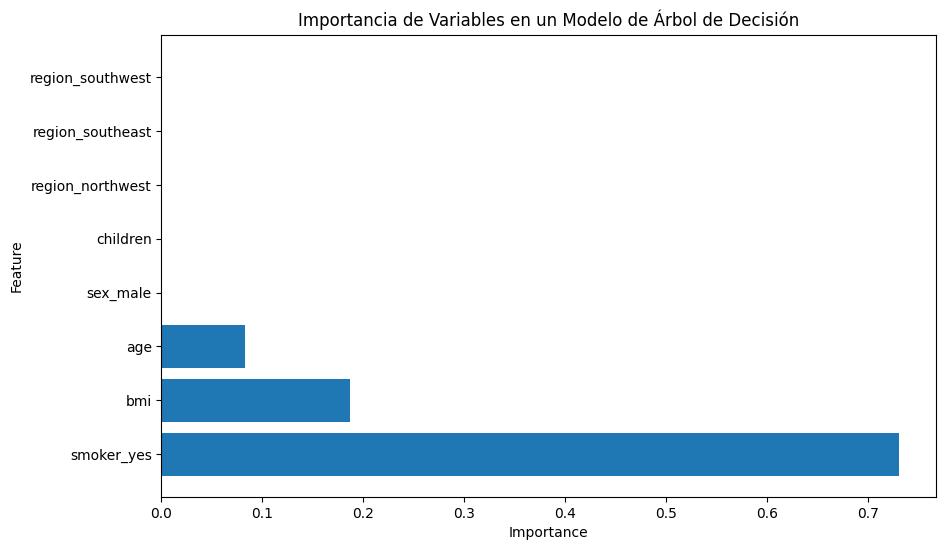

In [41]:
# Obtenemos la importancia de las variables
feature_importance = modelo_ArbolDecisionRegres.feature_importances_

# Creamos un DataFrame para visualizar las importancias junto con los nombres de las variables
feature_names = x_train.drop(columns='const').columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Ordenamos por importancia descendente
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Graficamos la importancia de las variables
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Importancia de Variables en un Modelo de Árbol de Decisión')
plt.show()

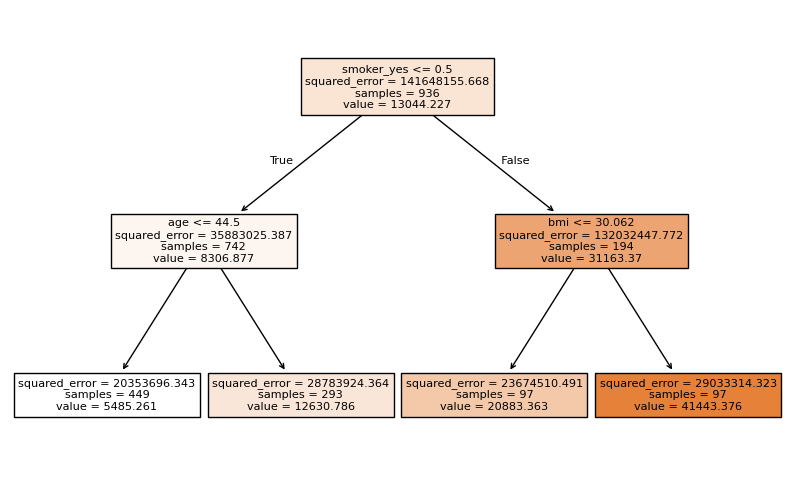

In [42]:
#import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10, 6))
plot_tree(modelo_ArbolDecisionRegres, filled=True, feature_names=x_train.drop(columns='const').columns)
plt.show()

In [12]:
# Ajustar el modelo de regresión lineal
modelo_OLS = sm.OLS(y_train, x_train).fit()

# Resumen del modelo
print(modelo_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     354.2
Date:                Wed, 28 May 2025   Prob (F-statistic):          9.23e-276
Time:                        23:13:26   Log-Likelihood:                -9456.6
No. Observations:                 936   AIC:                         1.893e+04
Df Residuals:                     927   BIC:                         1.897e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.299e+04   1148.340  

In [13]:
# ajustamos el indice en la data de test
x_test.reset_index(drop=True, inplace=True)

In [14]:
# calculamos predicción

# Regresión Lineal (Mínimos cuadrados ordinarios)
print('Predicción Regresión Lineal - OLS')
y_pred_OLS = modelo_OLS.predict(x_test)
print(y_pred_OLS.head(2))

# Árbol de Decisión para Regresión
print('Predicción Árbol de Decisión - Regresión')
y_pred_ArbolDecisionRegres = modelo_ArbolDecisionRegres.predict(x_test.drop(columns='const'))
y_pred_ArbolDecisionRegres = pd.DataFrame(y_pred_ArbolDecisionRegres)
print(y_pred_ArbolDecisionRegres.head(2))

Predicción Regresión Lineal - OLS
0    22825.346680
1    17845.585097
dtype: float64
Predicción Árbol de Decisión - Regresión
            0
0  14711.7438
1  14901.5167


In [15]:
# Error Cuadratico Medio

# Regresión Lineal - OLS
mse_OLS = mean_squared_error(y_test, y_pred_OLS)
print(f"Error cuadrático medio (MSE)- Regresión Lineal OLS: {mse_OLS:.4f}")

# Árbol de Decisión - Regresión
mse_ArbolDecisionRegres = mean_squared_error(y_test, y_pred_ArbolDecisionRegres)
print(f"Error cuadrático medio (MSE)- Árbol de Decisión: {mse_ArbolDecisionRegres:.4f}")
# Mientras menos mejor

Error cuadrático medio (MSE)- Regresión Lineal OLS: 40986218.2527
Error cuadrático medio (MSE)- Árbol de Decisión: 41744101.0194


In [ ]:
# Bajo esta vista, el mejor modelo es aquel que tiene menor Error cuadratico medio
# asi decidimos elegir el modelo de regresión lineal sobre el modelo de Arbol de Decisión.

# 2. ÁRBOLES DE DECISIÓN - CLASIFICACIÓN

In [16]:
# cargamos datos
url='https://raw.githubusercontent.com/ealaurel/MODELOS_PREDICTIVOS_202505/main/data/ifood_df.csv'
ifood_df = pd.read_csv(url,sep=',', encoding='iso-8859-1')

print(ifood_df.shape) #
ifood_df.head(2)

(2205, 39)


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0


In [17]:
# una copia a los datos
df = ifood_df.copy()

In [18]:
# seleccionamos variables explicativas y variables dependiente
#X = df[['Kidhome','Recency','education_Basic','Complain','Income','MntTotal','Age']]
X = df[['Kidhome','Recency','education_Basic']]
y = df['Response']

In [19]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=777)

In [20]:
# hallamos los mejores hiperparametros del modelo
# Crear el clasificador
clf = DecisionTreeClassifier()

# Definir la grilla de hiperparámetros a explorar
param_grid = {
    'max_depth': list(range(1,20)),#[1, 2,3,4,5,6,7,8,9,10,15, 20],
    'min_samples_split': list(range(1,10)),
    'min_samples_leaf': list(range(1,4))
}

# Realizar búsqueda en la grilla
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Mejores hiperparámetros encontrados
best_params = grid_search.best_params_
best_params

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
285 fits failed out of a total of 2565.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
285 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/uti

{'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [21]:
# Entrenamos el Modelo de Árbol de Decisión para Clasificación

# Crea un clasificador de árbol de decisión
modelo_ArbolDecisionClasif = DecisionTreeClassifier(max_depth=1,min_samples_leaf=1,min_samples_split=2)

# Entrena el modelo en los datos de entrenamiento
modelo_ArbolDecisionClasif.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1)

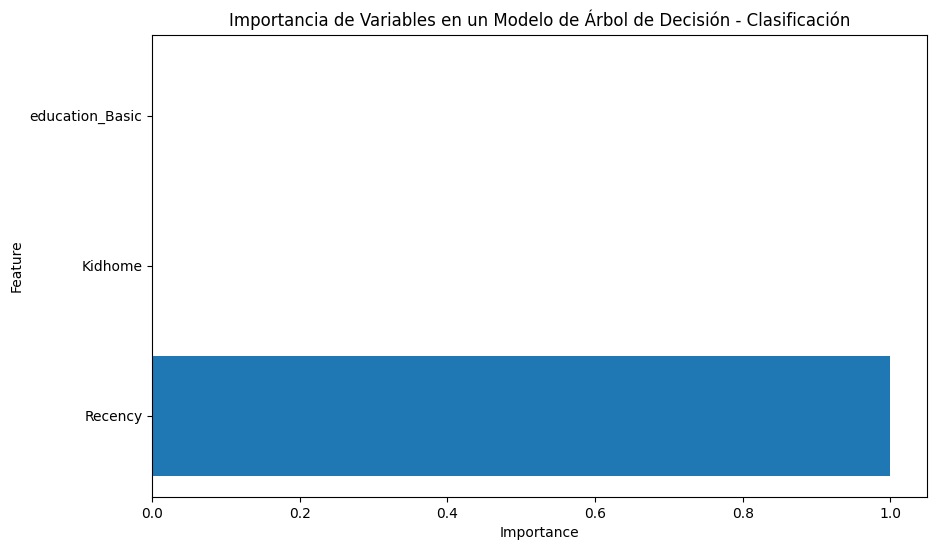

In [22]:
# Obtenemos la importancia de las variables
feature_importance = modelo_ArbolDecisionClasif.feature_importances_

# Creamos un DataFrame para visualizar las importancias junto con los nombres de las variables
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Ordenamos por importancia descendente
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Graficamos la importancia de las variables
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Importancia de Variables en un Modelo de Árbol de Decisión - Clasificación')
plt.show()

In [30]:
y_train.value_counts()

,count
Response,
0,1510
1,254


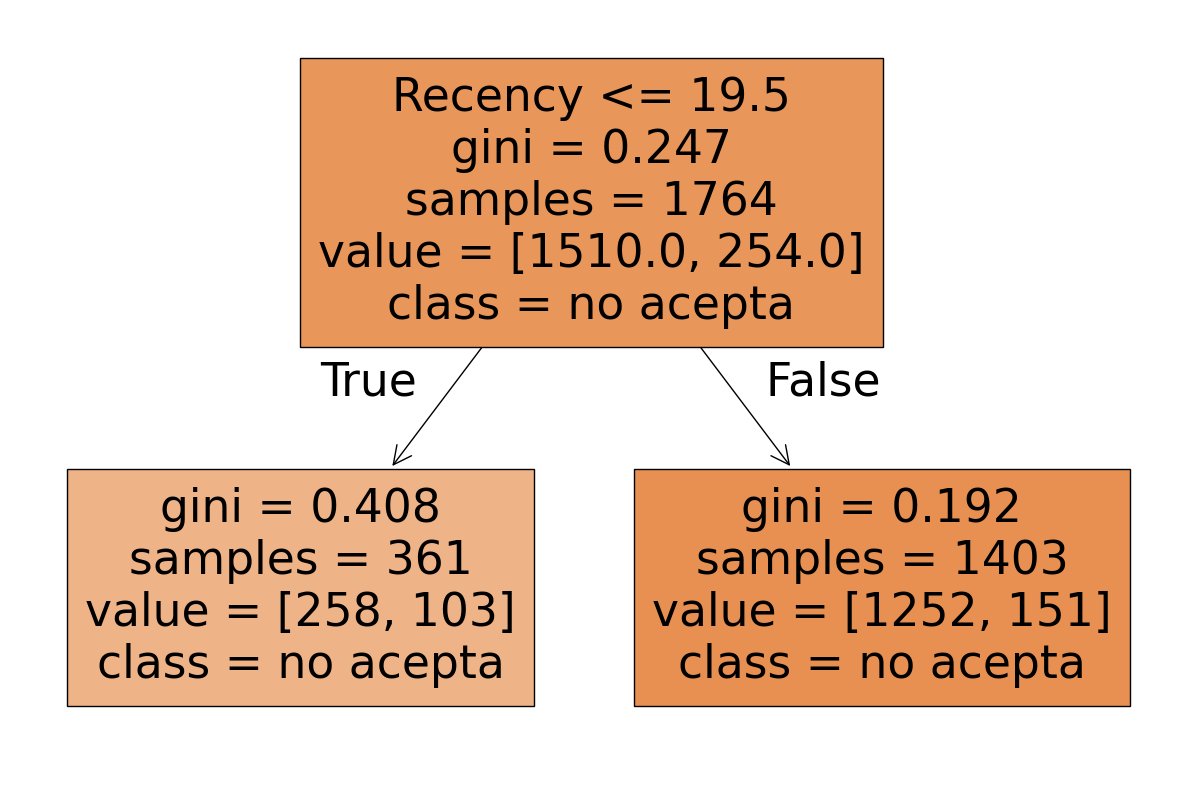

In [24]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 10))
plot_tree(modelo_ArbolDecisionClasif, filled=True, feature_names=X_train.columns, class_names=['no acepta', 'acepta'])
plt.show()

In [ ]:
# Ajusta el modelo de regresión logística
modelo_logit = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.397031
         Iterations 7


In [ ]:
# Muestra un resumen del modelo
print(modelo_logit.summary())

                           Logit Regression Results                           
Dep. Variable:               Response   No. Observations:                 1764
Model:                          Logit   Df Residuals:                     1761
Method:                           MLE   Df Model:                            2
Date:                Wed, 28 May 2025   Pseudo R-squ.:                 0.03667
Time:                        17:45:02   Log-Likelihood:                -700.36
converged:                       True   LL-Null:                       -727.02
Covariance Type:            nonrobust   LLR p-value:                 2.649e-12
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Kidhome            -0.6741      0.126     -5.348      0.000      -0.921      -0.427
Recency            -0.0319      0.002    -18.055      0.000      -0.035      -0.028
education_Basic    -1.4575      

In [ ]:
# ajustamos el indice en x_test
X_test.reset_index(drop=True, inplace=True)

In [ ]:
# Realiza predicciones en el conjunto de datos de prueba

# Regresión Logistica - Logit
print('Predicción Regresión Logística - Logit')
y_pred_logit = modelo_logit.predict(X_test)
print(y_pred_logit.head(2))

# Arbol de Decisión - Clasificación
print('Predicción Árbol de Decisión - Clasificación')
y_pred_ArbolDecisionClasif = modelo_ArbolDecisionClasif.predict_proba(X_test)
y_pred_ArbolDecisionClasif = pd.DataFrame(y_pred_ArbolDecisionClasif)
y_pred_ArbolDecisionClasif = y_pred_ArbolDecisionClasif.iloc[:,1]
print(y_pred_ArbolDecisionClasif.head(2))

Predicción Regresión Logística - Logit
0    0.083481
1    0.029883
dtype: float64
Predicción Árbol de Decisión - Clasificación
0    0.111111
1    0.000000
Name: 1, dtype: float64


In [ ]:
# Obteniendo el mejor corte de predicción
# Calcular la curva ROC - LOGIT
fpr, tpr, thresholds = roc_curve(y_test, y_pred_logit)

# Encontrar el umbral óptimo (máximo índice de Youden)
youden_index = tpr - fpr
optimal_threshold_logit = thresholds[np.argmax(youden_index)]

print("Umbral óptimo Logit:", optimal_threshold_logit)

Umbral óptimo Logit: 0.2121845462239729


In [ ]:
# Obteniendo el mejor corte de predicción
# Calcular la curva ROC - Arbol de Decisión
fpr, tpr, thresholds = roc_curve(y_test, y_pred_ArbolDecisionClasif)

# Encontrar el umbral óptimo (máximo índice de Youden)
youden_index = tpr - fpr
optimal_threshold_tree = thresholds[np.argmax(youden_index)]

print("Umbral óptimo- Arbol de Decisión:", optimal_threshold_tree)

Umbral óptimo- Arbol de Decisión: 0.05263157894736842


In [ ]:
# Matriz de confusión

            #Predicción
            #   0   1
#Valor Real 0 # VN FP
#Valor Real 1 # FN VP

# Regresión Logistica - Logit
confusion = confusion_matrix(y_test, (y_pred_logit>=optimal_threshold_logit).astype(int))
print("Matriz de confusión - Logit:")
print(confusion)

# Árbol de Decisión - Clasificación
confusion = confusion_matrix(y_test, (y_pred_ArbolDecisionClasif>=optimal_threshold_tree).astype(int))
print("\nMatriz de confusión - Árbol de Decisión:")
print(confusion)

Matriz de confusión - Logit:
[[260 102]
 [ 34  45]]

Matriz de confusión - Árbol de Decisión:
[[120 242]
 [ 12  67]]


In [ ]:
# Exactitud o Accuracy del modelo

# Regresión Logistica - Logit
exactitud_test_logit = accuracy_score(y_test, (y_pred_logit>=optimal_threshold_logit).astype(int))
print("Precisión del modelo-Logit:", exactitud_test_logit)

# Árbol de Decisión - Clasificación
exactitud_test_ArbolDecisionClasif = accuracy_score(y_test, (y_pred_ArbolDecisionClasif>=optimal_threshold_tree).astype(int))
print("Precisión del modelo-Arbol de Decisión:", exactitud_test_ArbolDecisionClasif)

Precisión del modelo-Logit: 0.691609977324263
Precisión del modelo-Arbol de Decisión: 0.42403628117913833


In [ ]:
## para exactitud LOGIT
#(157+70)/(157+205+9+70)
#
## para exactitud Árbol de Decisión
#(280+35)/(280+82+44+35)

0.7142857142857143

In [ ]:
# Sensibilidad (Proporción de verdaderos positivos de los valores reales positivos)

# Regresion Logistica - Logit
sensibilidad_test_logit = recall_score(y_test, (y_pred_logit>=optimal_threshold_logit).astype(int))
print("Sensibilidad del modelo-Logit:", sensibilidad_test_logit)

# Árbol de Decisión - Clasificación
sensibilidad_test_ArbolDecisionClasif = recall_score(y_test, (y_pred_ArbolDecisionClasif>=optimal_threshold_tree).astype(int))
print("Sensibilidad del modelo-Arbol de Decisión:", sensibilidad_test_ArbolDecisionClasif)

Sensibilidad del modelo-Logit: 0.569620253164557
Sensibilidad del modelo-Arbol de Decisión: 0.8481012658227848


In [ ]:
## Sensibilidad Logit
#70/(70+9)
#
## sensibilidad Arbol de Decisión
#35/(35+44)

0.4430379746835443

In [ ]:
# Precisión (Proporción de Verdaderos Positivos de las predicciónes positivas del modelo)

# Regresión Logistica - Logit
precision_score_logit = precision_score(y_test, (y_pred_logit>=optimal_threshold_logit).astype(int))
print("Precisión del modelo - Logit", precision_score_logit)

# Arbol de Decisión - Clasificación
precision_score_ArbolDecisionClasif = precision_score(y_test, (y_pred_ArbolDecisionClasif>=optimal_threshold_tree).astype(int))
print("Precisión del modelo - Árbol de Decisión", precision_score_ArbolDecisionClasif)

Precisión del modelo - Logit 0.30612244897959184
Precisión del modelo - Árbol de Decisión 0.2168284789644013


In [ ]:
# f1 sxore
# Regresión Logistica - Logit
precision_score_logit = f1_score(y_test, (y_pred_logit>=optimal_threshold_logit).astype(int))
print("Precisión del modelo - Logit", precision_score_logit)

# Arbol de Decisión - Clasificación
precision_score_ArbolDecisionClasif = f1_score(y_test, (y_pred_ArbolDecisionClasif>=optimal_threshold_tree).astype(int))
print("Precisión del modelo - Árbol de Decisión", precision_score_ArbolDecisionClasif)

Precisión del modelo - Logit 0.39823008849557523
Precisión del modelo - Árbol de Decisión 0.34536082474226804


# 3. RESULTADOS

In [ ]:
print('Nro de clientes en el piloto',df.shape[0])

Nro de clientes en el piloto 2205


In [ ]:
costo_piloto=6720
costo_piloto

6720

In [ ]:
ingreso_piloto=3674
ingreso_piloto

3674

In [ ]:
# beneficio del piloto
ingreso_piloto-costo_piloto

-3046

In [ ]:
# Propuesta

In [ ]:
# calculamos el ingreso por cliente
print('Clientes que aceptaron la oferta',df[df['Response']==1].shape[0],'de',df.shape[0],'clientes')
ingreso_xcliente = ingreso_piloto/df[df['Response']==1].shape[0]
print('ingreso por cliente que aceptó la oferta',ingreso_xcliente)

Clientes que aceptaron la oferta 333 de 2205 clientes
ingreso por cliente que aceptó la oferta 11.033033033033034


In [ ]:
# costo por cliente
costo_xcliente = costo_piloto/df.shape[0]
print('Costo por cliente',costo_xcliente)

Costo por cliente 3.0476190476190474


In [ ]:
# Regresión Logistica - Logit
confusion = confusion_matrix(y_test, (y_pred_logit>=optimal_threshold_logit).astype(int))
print("Matriz de confusión - Logit:")
print(confusion)

# Árbol de Decisión - Clasificación
confusion = confusion_matrix(y_test, (y_pred_ArbolDecisionClasif>=optimal_threshold_tree).astype(int))
print("\nMatriz de confusión - Árbol de Decisión:")
print(confusion)

Matriz de confusión - Logit:
[[260 102]
 [ 34  45]]

Matriz de confusión - Árbol de Decisión:
[[120 242]
 [ 12  67]]


In [ ]:
# inversión o costo - LOGIT, datos de testeo, representan un 20% del total de clientes en piloto
ingreso_xcliente*70-costo_xcliente*(102+45)

324.3123123123123

In [ ]:
# inversion o costo Arbol de Decisión, datos de testeo, representan un 20% del total de clientes en piloto
ingreso_xcliente*35-costo_xcliente*(242+67)

-555.5581295581295

In [ ]:
# beneficio en $us
# 324 es 20% # porcentaje del grupo de testeo
# x es al 100%(piloto) # total en el piloto

In [ ]:
# beneficio en clientes total del piloto
324*1/0.2

1620.0

In [ ]:
# se enviara campaña a solo un
(82+35)/(280+82+44+35)

# en un 26% de clientes con alta probabilidad , puedo tener benficios positivos,
# bajo el supuesto que mi población es 2205 clientes (piloto) , se tendra un beneficio de 145 $us

0.2653061224489796